In [3]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import os
import torch
import torch.nn.functional as F

os.environ["CUDA_DEVICE_ORDER"]='PCI_BUS_ID'
os.environ["CUDA_VISIBLE_DEVICES"]='3'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

In [4]:
def save_nifti(img, spacing, filename):
    affine = np.eye(4)
    affine[0,0] = -spacing[0]
    affine[1,1] = -spacing[1]
    affine[2,2] = spacing[2]
    nib.save(nib.Nifti1Image(img, affine), filename)
    
def kpts_world(kpts_pt, shape, align_corners=None):
    device = kpts_pt.device
    D, H, W = shape
    
    if not align_corners:
        kpts_pt /= (torch.tensor([W, H, D], device=device) - 1)/torch.tensor([W, H, D], device=device)
    kpts_world_ = (((kpts_pt + 1) / 2) * (torch.tensor([W, H, D], device=device) - 1)).flip(-1) 
    
    return kpts_world_

def bbox(img):
    r = np.any(img, axis=(1, 2))
    c = np.any(img, axis=(0, 2))
    z = np.any(img, axis=(0, 1))

    rmin, rmax = np.where(r)[0][[0, -1]]
    cmin, cmax = np.where(c)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]

    return rmin, rmax, cmin, cmax, zmin, zmax

In [130]:
!mkdir -p ./preprocessed_new/source_training
!mkdir -p ./preprocessed_new/target_training
!mkdir -p ./preprocessed_new/target_validation

!mkdir -p ./preprocessed_new/resampled/0.5mm/source_training
!mkdir -p ./preprocessed_new/resampled/0.5mm/target_training
!mkdir -p ./preprocessed_new/resampled/0.5mm/target_validation

!mkdir -p ./preprocessed_new/resampled/0.5mm/crop/source_training
!mkdir -p ./preprocessed_new/resampled/0.5mm/crop/target_training
!mkdir -p ./preprocessed_new/resampled/0.5mm/crop/target_validation

!mkdir -p ./preprocessed_new/resampled/0.5mm/localised_crop/96/source_training
!mkdir -p ./preprocessed_new/resampled/0.5mm/localised_crop/96/target_training
!mkdir -p ./preprocessed_new/resampled/0.5mm/localised_crop/96/target_validation

!mkdir -p ./preprocessed_new/resampled/0.5mm/localised_crop/128/source_training
!mkdir -p ./preprocessed_new/resampled/0.5mm/localised_crop/128/target_training
!mkdir -p ./preprocessed_new/resampled/0.5mm/localised_crop/128/target_validation

In [6]:
for i in range(105):
    print('process {}/105...'.format(i))
    
    img = nib.load('./source_training/crossmoda_{}_ceT1.nii.gz'.format(i + 1))
    label = nib.load('./source_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    spacing = img.header.get_zooms()
    
    img = torch.from_numpy(img.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    label = torch.from_numpy(label.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()

    save_nifti(img[0,0].cpu().numpy(), spacing, './preprocessed_new/source_training/crossmoda_{}_ceT1.nii.gz'.format(i + 1))
    save_nifti(label[0,0].cpu().numpy(), spacing, './preprocessed_new/source_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    print('--')
    
for i in range(105,210):
    print('process {}/105...'.format(i - 105))
    
    img = nib.load('./target_training/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./target_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    spacing = img.header.get_zooms()
    
    img = torch.from_numpy(img.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    label = torch.from_numpy(label.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()

    save_nifti(img[0,0].cpu().numpy(), spacing, './preprocessed_new/target_training/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    save_nifti(label[0,0].cpu().numpy(), spacing, './preprocessed_new/target_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    print('--')
    
for i in range(210,242):
    print('process {}/32...'.format(i - 210))
    
    img = nib.load('./target_validation/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./target_validation/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    spacing = img.header.get_zooms()
    
    img = torch.from_numpy(img.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    label = torch.from_numpy(label.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()

    save_nifti(img[0,0].cpu().numpy(), spacing, './preprocessed_new/target_validation/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    save_nifti(label[0,0].cpu().numpy(), spacing, './preprocessed_new/target_validation/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    print('--')

process 0/105...
--
process 1/105...
--
process 2/105...
--
process 3/105...
--
process 4/105...
--
process 5/105...
--
process 6/105...
--
process 7/105...
--
process 8/105...
--
process 9/105...
--
process 10/105...
--
process 11/105...
--
process 12/105...
--
process 13/105...
--
process 14/105...
--
process 15/105...
--
process 16/105...
--
process 17/105...
--
process 18/105...
--
process 19/105...
--
process 20/105...
--
process 21/105...
--
process 22/105...
--
process 23/105...
--
process 24/105...
--
process 25/105...
--
process 26/105...
--
process 27/105...
--
process 28/105...
--
process 29/105...
--
process 30/105...
--
process 31/105...
--
process 32/105...
--
process 33/105...
--
process 34/105...
--
process 35/105...
--
process 36/105...
--
process 37/105...
--
process 38/105...
--
process 39/105...
--
process 40/105...
--
process 41/105...
--
process 42/105...
--
process 43/105...
--
process 44/105...
--
process 45/105...
--
process 46/105...
--
process 47/105...
--
pr

In [7]:
ref_spacing = 0.5*torch.ones(3,)
shapes = []
spacings = []
for i in range(105):
    img = nib.load('./preprocessed_new/source_training/crossmoda_{}_ceT1.nii.gz'.format(i + 1))
    
    shape = torch.tensor(img.shape)
    spacing = torch.tensor(img.header.get_zooms())
    scale_factor = spacing / ref_spacing
    new_shape = (shape * scale_factor).round().long()
    new_scale_factor = new_shape / shape
    new_spacing = spacing / new_scale_factor
    
    shapes.append(new_shape)
    spacings.append(new_spacing)
    
for i in range(105,210):
    img = nib.load('./preprocessed_new/target_training/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    
    shape = torch.tensor(img.shape)
    spacing = torch.tensor(img.header.get_zooms())
    scale_factor = spacing / ref_spacing
    new_shape = (shape * scale_factor).round().long()
    new_scale_factor = new_shape / shape
    new_spacing = spacing / new_scale_factor
    
    shapes.append(new_shape)
    spacings.append(new_spacing)
    
for i in range(210,242):
    img = nib.load('./preprocessed_new/target_validation/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    
    shape = torch.tensor(img.shape)
    spacing = torch.tensor(img.header.get_zooms())
    scale_factor = spacing / ref_spacing
    new_shape = (shape * scale_factor).round().long()
    new_scale_factor = new_shape / shape
    new_spacing = spacing / new_scale_factor
    
    shapes.append(new_shape)
    spacings.append(new_spacing)

print(torch.stack(shapes).min(0)[0], torch.stack(shapes).max(0)[0])
print(torch.stack(spacings).min(0)[0], torch.stack(spacings).max(0)[0])

ref_shape = torch.stack(shapes).max(0)[0]

tensor([420, 420,  60]) tensor([420, 420, 360])
tensor([0.5000, 0.5000, 0.5000]) tensor([0.5000, 0.5000, 0.5000])


In [11]:
for i in range(105):
    print('process {}/105...'.format(i))
    
    img = nib.load('./source_training/crossmoda_{}_ceT1.nii.gz'.format(i + 1))
    label = nib.load('./source_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    shape = torch.tensor(img.shape)
    spacing = torch.tensor(img.header.get_zooms())
    scale_factor = spacing / ref_spacing
    new_shape = (shape * scale_factor).round().long()
    new_scale_factor = new_shape / shape
    new_spacing = spacing / new_scale_factor
    
    img = torch.from_numpy(img.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    label = torch.from_numpy(label.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    
    img = F.interpolate(img, new_shape.tolist(), mode='trilinear', align_corners=True)
    label = (F.interpolate(F.one_hot(label.long())[:, 0, :, :, :, :].permute(0, 4, 1, 2, 3).float(), new_shape.tolist(), mode='trilinear', align_corners=True) > 0.5).max(1)[1].unsqueeze(1).float()
    
    shape = torch.tensor(img.shape[2:])
    spacing = new_spacing
    
    if shape[0] < ref_shape[0]:
        pad = ref_shape[0] - shape[0]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [0, 0, 0, 0, pad1, pad2], mode='constant', value=img.min())
        label = F.pad(label, [0, 0, 0, 0, pad1, pad2], mode='constant', value=0)
        
    if shape[1] < ref_shape[1]:
        pad = ref_shape[1] - shape[1]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [0, 0, pad1, pad2, 0, 0], mode='constant', value=img.min())
        label = F.pad(label, [0, 0, pad1, pad2, 0, 0], mode='constant', value=0)
        
    if shape[2] < ref_shape[2]:
        pad = ref_shape[2] - shape[2]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [pad1, pad2, 0, 0, 0, 0], mode='constant', value=img.min())
        label = F.pad(label, [pad1, pad2, 0, 0, 0, 0], mode='constant', value=0)
    
    shape = torch.tensor(img.shape[2:])
    new_spacing = spacing / (ref_shape / shape)

    save_nifti(img[0,0].cpu().numpy(), new_spacing, './preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_ceT1.nii.gz'.format(i + 1))
    save_nifti(label[0,0].cpu().numpy(), new_spacing, './preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    print('--')
    
for i in range(105,210):
    print('process {}/105...'.format(i - 105))
    
    img = nib.load('./target_training/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./target_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    shape = torch.tensor(img.shape)
    spacing = torch.tensor(img.header.get_zooms())
    scale_factor = spacing / ref_spacing
    new_shape = (shape * scale_factor).round().long()
    new_scale_factor = new_shape / shape
    new_spacing = spacing / new_scale_factor
    
    img = torch.from_numpy(img.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    label = torch.from_numpy(label.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    
    img = F.interpolate(img, new_shape.tolist(), mode='trilinear', align_corners=True)
    label = (F.interpolate(F.one_hot(label.long())[:, 0, :, :, :, :].permute(0, 4, 1, 2, 3).float(), new_shape.tolist(), mode='trilinear', align_corners=True) > 0.5).max(1)[1].unsqueeze(1).float()
    
    shape = torch.tensor(img.shape[2:])
    spacing = new_spacing
    
    if shape[0] < ref_shape[0]:
        pad = ref_shape[0] - shape[0]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [0, 0, 0, 0, pad1, pad2], mode='constant', value=img.min())
        label = F.pad(label, [0, 0, 0, 0, pad1, pad2], mode='constant', value=0)
        
    if shape[1] < ref_shape[1]:
        pad = ref_shape[1] - shape[1]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [0, 0, pad1, pad2, 0, 0], mode='constant', value=img.min())
        label = F.pad(label, [0, 0, pad1, pad2, 0, 0], mode='constant', value=0)
        
    if shape[2] < ref_shape[2]:
        pad = ref_shape[2] - shape[2]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [pad1, pad2, 0, 0, 0, 0], mode='constant', value=img.min())
        label = F.pad(label, [pad1, pad2, 0, 0, 0, 0], mode='constant', value=0)
    
    shape = torch.tensor(img.shape[2:])
    new_spacing = spacing / (ref_shape / shape)

    save_nifti(img[0,0].cpu().numpy(), new_spacing, './preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    save_nifti(label[0,0].cpu().numpy(), new_spacing, './preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    print('--')
    
for i in range(210,242):
    print('process {}/32...'.format(i - 210))
    
    img = nib.load('./target_validation/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./target_validation/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    shape = torch.tensor(img.shape)
    spacing = torch.tensor(img.header.get_zooms())
    scale_factor = spacing / ref_spacing
    new_shape = (shape * scale_factor).round().long()
    new_scale_factor = new_shape / shape
    new_spacing = spacing / new_scale_factor
    
    img = torch.from_numpy(img.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    label = torch.from_numpy(label.get_fdata()).unsqueeze(0).unsqueeze(0).float().cuda()
    
    img = F.interpolate(img, new_shape.tolist(), mode='trilinear', align_corners=True)
    label = (F.interpolate(F.one_hot(label.long())[:, 0, :, :, :, :].permute(0, 4, 1, 2, 3).float(), new_shape.tolist(), mode='trilinear', align_corners=True) > 0.5).max(1)[1].unsqueeze(1).float()
    
    shape = torch.tensor(img.shape[2:])
    spacing = new_spacing
    
    if shape[0] < ref_shape[0]:
        pad = ref_shape[0] - shape[0]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [0, 0, 0, 0, pad1, pad2], mode='constant', value=img.min())
        label = F.pad(label, [0, 0, 0, 0, pad1, pad2], mode='constant', value=0)
        
    if shape[1] < ref_shape[1]:
        pad = ref_shape[1] - shape[1]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [0, 0, pad1, pad2, 0, 0], mode='constant', value=img.min())
        label = F.pad(label, [0, 0, pad1, pad2, 0, 0], mode='constant', value=0)
        
    if shape[2] < ref_shape[2]:
        pad = ref_shape[2] - shape[2]
        pad1 = pad // 2
        pad2 = pad - pad1
        img = F.pad(img, [pad1, pad2, 0, 0, 0, 0], mode='constant', value=img.min())
        label = F.pad(label, [pad1, pad2, 0, 0, 0, 0], mode='constant', value=0)
    
    shape = torch.tensor(img.shape[2:])
    new_spacing = spacing / (ref_shape / shape)

    save_nifti(img[0,0].cpu().numpy(), new_spacing, './preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    save_nifti(label[0,0].cpu().numpy(), new_spacing, './preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    print('--')


process 0/105...
--
process 1/105...
--
process 2/105...
--
process 3/105...
--
process 4/105...
--
process 5/105...
--
process 6/105...
--
process 7/105...
--
process 8/105...
--
process 9/105...
--
process 10/105...
--
process 11/105...
--
process 12/105...
--
process 13/105...
--
process 14/105...
--
process 15/105...
--
process 16/105...
--
process 17/105...
--
process 18/105...
--
process 19/105...
--
process 20/105...
--
process 21/105...
--
process 22/105...
--
process 23/105...
--
process 24/105...
--
process 25/105...
--
process 26/105...
--
process 27/105...
--
process 28/105...
--
process 29/105...
--
process 30/105...
--
process 31/105...
--
process 32/105...
--
process 33/105...
--
process 34/105...
--
process 35/105...
--
process 36/105...
--
process 37/105...
--
process 38/105...
--
process 39/105...
--
process 40/105...
--
process 41/105...
--
process 42/105...
--
process 43/105...
--
process 44/105...
--
process 45/105...
--
process 46/105...
--
process 47/105...
--
pr

In [64]:
tumour_locations = []
tumour_labels_l = 0
tumour_labels_r = 0
cochlea_labels_l = 0
cochlea_labels_r = 0

for i in range(105):
    print('process {}/105...'.format(i))

    label = nib.load('./preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_Label.nii.gz'.format(i + 1)).get_fdata()
    
    tumour_label = label==1

    grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *label.shape], align_corners=True)
    tumour_location = 'l' if kpts_world((grid * torch.from_numpy(tumour_label/tumour_label.sum()).view(1, *label.shape, 1)).sum([1,2,3]).unsqueeze(0), label.shape, align_corners=True)[0, 0, 0] >= 210 else 'r'
    tumour_locations.append(tumour_location)

    if tumour_location == 'l':
        tumour_labels_l += tumour_label
    else:
        tumour_labels_r += tumour_label

    cochlea_labels_l += label==2
    cochlea_labels_r += label==2

for i in range(105,210):
    print('process {}/105...'.format(i - 105))

    label = nib.load('./preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_Label.nii.gz'.format(i + 1)).get_fdata()
    label_ = np.zeros(label.shape)
    label_[:, :, :-40] = label[:, :, 40:]
    label = label_
    
    tumour_label = label==1

    grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *label.shape], align_corners=True)
    tumour_location = 'l' if kpts_world((grid * torch.from_numpy(tumour_label/tumour_label.sum()).view(1, *label.shape, 1)).sum([1,2,3]).unsqueeze(0), label.shape, align_corners=True)[0, 0, 0] >= 210 else 'r'
    tumour_locations.append(tumour_location)

    if tumour_location == 'l':
        tumour_labels_l += tumour_label
    else:
        tumour_labels_r += tumour_label

    cochlea_labels_l += label==2
    cochlea_labels_r += label==2

for i in range(210,242):
    print('process {}/32...'.format(i - 210))

    label = nib.load('./preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_Label.nii.gz'.format(i + 1)).get_fdata()
    label_ = np.zeros(label.shape)
    label_[:, :, :-40] = label[:, :, 40:]
    label = label_
    
    tumour_label = label==1

    grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *label.shape], align_corners=True)
    tumour_location = 'l' if kpts_world((grid * torch.from_numpy(tumour_label/tumour_label.sum()).view(1, *label.shape, 1)).sum([1,2,3]).unsqueeze(0), label.shape, align_corners=True)[0, 0, 0] >= 210 else 'r'
    tumour_locations.append(tumour_location)

    if tumour_location == 'l':
        tumour_labels_l += tumour_label
    else:
        tumour_labels_r += tumour_label

    cochlea_labels_l += label==2
    cochlea_labels_r += label==2

cochlea_labels_l[:210, :, :] = 0
cochlea_labels_r[210:, :, :] = 0

process 0/105...
process 1/105...
process 2/105...
process 3/105...
process 4/105...
process 5/105...
process 6/105...
process 7/105...
process 8/105...
process 9/105...
process 10/105...
process 11/105...
process 12/105...
process 13/105...
process 14/105...
process 15/105...
process 16/105...
process 17/105...
process 18/105...
process 19/105...
process 20/105...
process 21/105...
process 22/105...
process 23/105...
process 24/105...
process 25/105...
process 26/105...
process 27/105...
process 28/105...
process 29/105...
process 30/105...
process 31/105...
process 32/105...
process 33/105...
process 34/105...
process 35/105...
process 36/105...
process 37/105...
process 38/105...
process 39/105...
process 40/105...
process 41/105...
process 42/105...
process 43/105...
process 44/105...
process 45/105...
process 46/105...
process 47/105...
process 48/105...
process 49/105...
process 50/105...
process 51/105...
process 52/105...
process 53/105...
process 54/105...
process 55/105...
pr

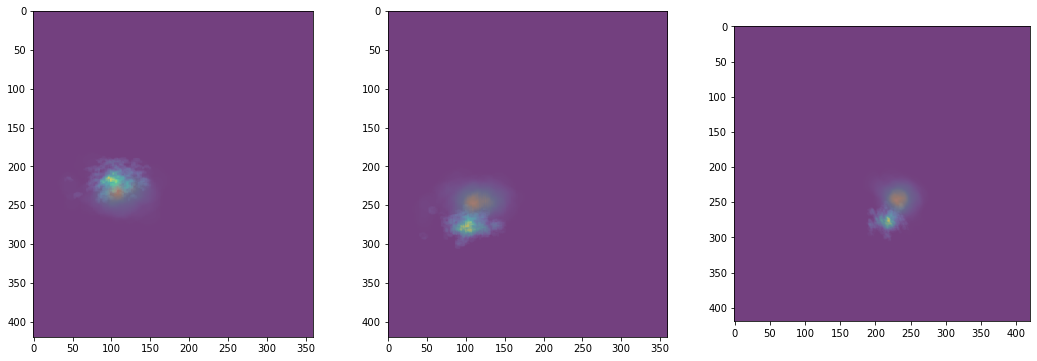

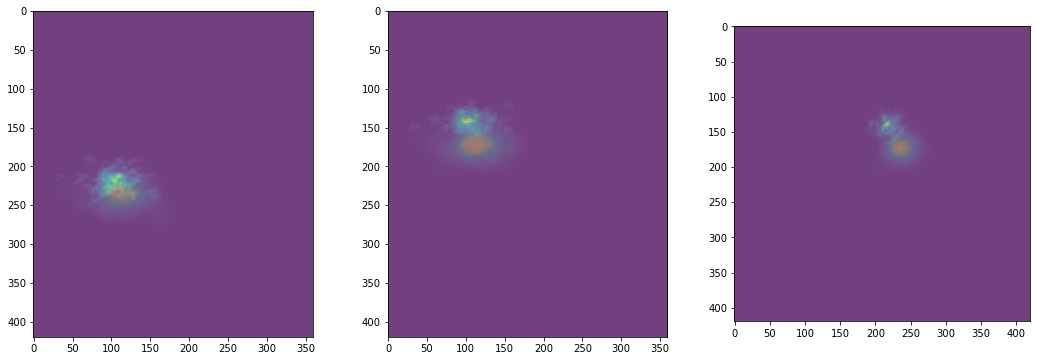

In [80]:
plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(tumour_labels_l.sum(0), alpha=0.5)
plt.imshow(cochlea_labels_l.sum(0), alpha=0.5)
plt.subplot(132)
plt.imshow(tumour_labels_l.sum(1), alpha=0.5)
plt.imshow(cochlea_labels_l.sum(1), alpha=0.5)
plt.subplot(133)
plt.imshow(tumour_labels_l.sum(2), alpha=0.5)
plt.imshow(cochlea_labels_l.sum(2), alpha=0.5)

plt.figure(figsize=(18,6))
plt.subplot(131)
plt.imshow(tumour_labels_r.sum(0), alpha=0.5)
plt.imshow(cochlea_labels_r.sum(0), alpha=0.5)
plt.subplot(132)
plt.imshow(tumour_labels_r.sum(1), alpha=0.5)
plt.imshow(cochlea_labels_r.sum(1), alpha=0.5)
plt.subplot(133)
plt.imshow(tumour_labels_r.sum(2), alpha=0.5)
plt.imshow(cochlea_labels_r.sum(2), alpha=0.5)


In [84]:
tumour_bbox_l = torch.tensor(bbox(tumour_labels_l)).reshape(3,2).t()
tumour_bbox_shape_l = tumour_bbox_l[1]-tumour_bbox_l[0]
tumour_bbox_ref_shape_l = ((tumour_bbox_shape_l//16+1)*16)

tumour_bbox_r = torch.tensor(bbox(tumour_labels_r)).reshape(3,2).t()
tumour_bbox_shape_r = tumour_bbox_r[1]-tumour_bbox_r[0]
tumour_bbox_ref_shape_r = ((tumour_bbox_shape_r//16+1)*16)

tumour_bbox_ref_shape = torch.tensor([128, 128, 192])

diff_l = tumour_bbox_ref_shape - tumour_bbox_shape_l
diff_l1 = diff_l // 2
diff_l2 = diff_l - diff_l1

tumour_bbox_l[0] -= diff_l1
tumour_bbox_l[1] += diff_l2

diff_r = tumour_bbox_ref_shape - tumour_bbox_shape_r
diff_r1 = diff_r // 2
diff_r2 = diff_r - diff_r1

tumour_bbox_r[0] -= diff_r1
tumour_bbox_r[1] += diff_r2

print(tumour_bbox_l)
print(tumour_bbox_r[1]-tumour_bbox_r[0])
print(tumour_bbox_r)
print(tumour_bbox_l[1]-tumour_bbox_l[0])

tensor([[186, 165,   7],
        [314, 293, 199]])
tensor([128, 128, 192])
tensor([[100, 169,  11],
        [228, 297, 203]])
tensor([128, 128, 192])


In [91]:
tumour_bbox_l = torch.tensor(bbox(tumour_labels_l)).reshape(3,2).t()
tumour_bbox_shape_l = tumour_bbox_l[1]-tumour_bbox_l[0]
tumour_bbox_ref_shape_l = ((tumour_bbox_shape_l//16+1)*16)

tumour_bbox_r = torch.tensor(bbox(tumour_labels_r)).reshape(3,2).t()
tumour_bbox_shape_r = tumour_bbox_r[1]-tumour_bbox_r[0]
tumour_bbox_ref_shape_r = ((tumour_bbox_shape_r//16+1)*16)

tumour_bbox_ref_shape = torch.max(tumour_bbox_ref_shape_l, tumour_bbox_ref_shape_r)
tumour_bbox_ref_shape[1] += 16
tumour_bbox_ref_shape[2] += 16

diff_l = tumour_bbox_ref_shape - tumour_bbox_shape_l
diff_l1 = diff_l // 2
diff_l2 = diff_l - diff_l1

tumour_bbox_l[0] -= diff_l1
tumour_bbox_l[1] += diff_l2

diff_r = tumour_bbox_ref_shape - tumour_bbox_shape_r
diff_r1 = diff_r // 2
diff_r2 = diff_r - diff_r1

tumour_bbox_r[0] -= diff_r1
tumour_bbox_r[1] += diff_r2

print(tumour_bbox_l)
print(tumour_bbox_r)

tensor([[ 93,  82,   4],
        [157, 146, 100]])
tensor([[ 50,  84,   5],
        [114, 148, 101]])


/share/data_supergrover2/hansen/temp/conda/miniconda3/envs/pt1.9c11.1/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [87]:
for i in range(105):
    print('process {}/105...'.format(i))
    
    img = nib.load('./preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_ceT1.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    spacing = img.header.get_zooms()
    
    img = img.get_fdata()
    label = label.get_fdata()
   
    img_tumour_crop_l = img[tumour_bbox_l[0,0]:tumour_bbox_l[1,0],tumour_bbox_l[0,1]:tumour_bbox_l[1,1],tumour_bbox_l[0,2]:tumour_bbox_l[1,2]]
    img_tumour_crop_r = img[tumour_bbox_r[0,0]:tumour_bbox_r[1,0],tumour_bbox_r[0,1]:tumour_bbox_r[1,1],tumour_bbox_r[0,2]:tumour_bbox_r[1,2]]
    
    label_tumour_crop_l = label[tumour_bbox_l[0,0]:tumour_bbox_l[1,0],tumour_bbox_l[0,1]:tumour_bbox_l[1,1],tumour_bbox_l[0,2]:tumour_bbox_l[1,2]]
    label_tumour_crop_r = label[tumour_bbox_r[0,0]:tumour_bbox_r[1,0],tumour_bbox_r[0,1]:tumour_bbox_r[1,1],tumour_bbox_r[0,2]:tumour_bbox_r[1,2]]

    save_nifti(img_tumour_crop_l.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_ceT1_l.nii.gz'.format(i + 1))
    save_nifti(img_tumour_crop_r.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_ceT1_r.nii.gz'.format(i + 1))
    
    save_nifti(label_tumour_crop_l.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1))
    save_nifti(label_tumour_crop_r.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1))#

    print('--')

for i in range(105,210):
    print('process {}/105...'.format(i - 105))

    img = nib.load('./preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_Label.nii.gz'.format(i + 1))
    
    spacing = img.header.get_zooms()
    
    img = img.get_fdata()
    label = label.get_fdata()
    
    img_ = np.zeros(label.shape)
    img_[:, :, :-40] = img[:, :, 40:]
    img = img_
    
    label_ = np.zeros(label.shape)
    label_[:, :, :-40] = label[:, :, 40:]
    label = label_
    
    img_tumour_crop_l = img[tumour_bbox_l[0,0]:tumour_bbox_l[1,0],tumour_bbox_l[0,1]:tumour_bbox_l[1,1],tumour_bbox_l[0,2]:tumour_bbox_l[1,2]]
    img_tumour_crop_r = img[tumour_bbox_r[0,0]:tumour_bbox_r[1,0],tumour_bbox_r[0,1]:tumour_bbox_r[1,1],tumour_bbox_r[0,2]:tumour_bbox_r[1,2]]
    
    label_tumour_crop_l = label[tumour_bbox_l[0,0]:tumour_bbox_l[1,0],tumour_bbox_l[0,1]:tumour_bbox_l[1,1],tumour_bbox_l[0,2]:tumour_bbox_l[1,2]]
    label_tumour_crop_r = label[tumour_bbox_r[0,0]:tumour_bbox_r[1,0],tumour_bbox_r[0,1]:tumour_bbox_r[1,1],tumour_bbox_r[0,2]:tumour_bbox_r[1,2]]

    save_nifti(img_tumour_crop_l.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_hrT2_l.nii.gz'.format(i + 1))
    save_nifti(img_tumour_crop_r.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_hrT2_r.nii.gz'.format(i + 1))
    
    save_nifti(label_tumour_crop_l.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1))
    save_nifti(label_tumour_crop_r.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1))

    print('--')

for i in range(210,242):
    print('process {}/32...'.format(i - 210))

    img = nib.load('./preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_Label.nii.gz'.format(i + 1))
        
    spacing = img.header.get_zooms()
    
    img = img.get_fdata()
    label = label.get_fdata()
    
    img_ = np.zeros(label.shape)
    img_[:, :, :-40] = img[:, :, 40:]
    img = img_
    
    label_ = np.zeros(label.shape)
    label_[:, :, :-40] = label[:, :, 40:]
    label = label_
    
    img_tumour_crop_l = img[tumour_bbox_l[0,0]:tumour_bbox_l[1,0],tumour_bbox_l[0,1]:tumour_bbox_l[1,1],tumour_bbox_l[0,2]:tumour_bbox_l[1,2]]
    img_tumour_crop_r = img[tumour_bbox_r[0,0]:tumour_bbox_r[1,0],tumour_bbox_r[0,1]:tumour_bbox_r[1,1],tumour_bbox_r[0,2]:tumour_bbox_r[1,2]]
    
    label_tumour_crop_l = label[tumour_bbox_l[0,0]:tumour_bbox_l[1,0],tumour_bbox_l[0,1]:tumour_bbox_l[1,1],tumour_bbox_l[0,2]:tumour_bbox_l[1,2]]
    label_tumour_crop_r = label[tumour_bbox_r[0,0]:tumour_bbox_r[1,0],tumour_bbox_r[0,1]:tumour_bbox_r[1,1],tumour_bbox_r[0,2]:tumour_bbox_r[1,2]]

    save_nifti(img_tumour_crop_l.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_hrT2_l.nii.gz'.format(i + 1))
    save_nifti(img_tumour_crop_r.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_hrT2_r.nii.gz'.format(i + 1))
    
    save_nifti(label_tumour_crop_l.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_l.nii.gz'.format(i + 1))
    save_nifti(label_tumour_crop_r.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_r.nii.gz'.format(i + 1))

    print('--')

process 0/105...
--
process 1/105...
--
process 2/105...
--
process 3/105...
--
process 4/105...
--
process 5/105...
--
process 6/105...
--
process 7/105...
--
process 8/105...
--
process 9/105...
--
process 10/105...
--
process 11/105...
--
process 12/105...
--
process 13/105...
--
process 14/105...
--
process 15/105...
--
process 16/105...
--
process 17/105...
--
process 18/105...
--
process 19/105...
--
process 20/105...
--
process 21/105...
--
process 22/105...
--
process 23/105...
--
process 24/105...
--
process 25/105...
--
process 26/105...
--
process 27/105...
--
process 28/105...
--
process 29/105...
--
process 30/105...
--
process 31/105...
--
process 32/105...
--
process 33/105...
--
process 34/105...
--
process 35/105...
--
process 36/105...
--
process 37/105...
--
process 38/105...
--
process 39/105...
--
process 40/105...
--
process 41/105...
--
process 42/105...
--
process 43/105...
--
process 44/105...
--
process 45/105...
--
process 46/105...
--
process 47/105...
--
pr

In [116]:
import csv

with open('./tumour_locations.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

loc = [d[1] for d in data]
ind = [int(d[0]) for d in data]
ind_r = [ind[i] for i in range(len(ind)) if loc[i]=='r']
print(ind_r)
ind_l = [ind[i] for i in range(len(ind)) if loc[i]=='l']
print(ind_l)

[1, 3, 4, 5, 6, 7, 9, 11, 12, 16, 17, 19, 23, 24, 25, 27, 29, 30, 32, 33, 35, 36, 37, 39, 40, 42, 44, 45, 46, 47, 48, 50, 52, 53, 54, 57, 59, 60, 65, 68, 70, 72, 73, 74, 76, 77, 78, 80, 82, 83, 84, 85, 86, 91, 92, 94, 95, 96, 97, 98, 100, 101, 106, 107, 108, 110, 112, 113, 116, 118, 120, 121, 122, 123, 124, 127, 130, 132, 134, 135, 137, 138, 142, 144, 148, 150, 151, 153, 154, 155, 156, 159, 160, 161, 165, 166, 167, 168, 170, 171, 173, 174, 176, 179, 180, 181, 185, 186, 191, 194, 195, 196, 198, 201, 204, 205, 208, 209, 210, 212, 213, 215, 218, 219, 224, 225, 226, 230, 231, 233, 237, 241]
[2, 8, 10, 13, 14, 15, 18, 20, 21, 22, 26, 28, 31, 34, 38, 41, 43, 49, 51, 55, 56, 58, 61, 62, 63, 64, 66, 67, 69, 71, 75, 79, 81, 87, 88, 89, 90, 93, 99, 102, 103, 104, 105, 109, 111, 114, 115, 117, 119, 125, 126, 128, 129, 131, 133, 136, 139, 140, 141, 143, 145, 146, 147, 149, 152, 157, 158, 162, 163, 164, 169, 172, 175, 177, 178, 182, 183, 184, 187, 188, 189, 190, 192, 193, 197, 199, 200, 202, 203, 2

In [121]:
all_labels_l = []
all_labels_r = []
for i in range(105):
    print(i)
    if i+1 in ind_l:
        label_l = nib.load('./preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata()
        all_labels_l.append(label_l)
    else:
        label_r = nib.load('./preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata()
        all_labels_r.append(label_r)
    
for i in range(105,210):
    print(i)
    if i+1 in ind_l:
        label_l = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata()
        all_labels_l.append(label_l)
    else:
        label_r = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata()
        all_labels_r.append(label_r)
        
for i in range(210,242):
    print(i)
    if i+1 in ind_l:
        label_l = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata()
        all_labels_l.append(label_l)
    else:
        label_r = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata()
        all_labels_r.append(label_r)
        
all_labels_l = np.stack(all_labels_l)
all_labels_r = np.stack(all_labels_r)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


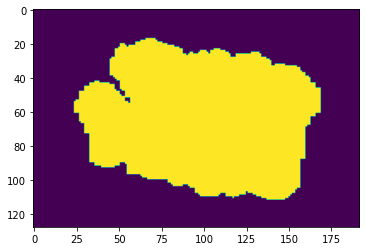

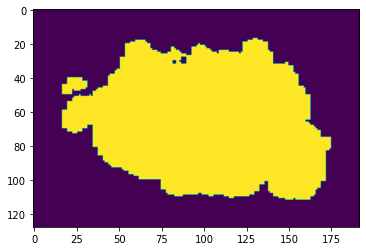

In [122]:
plt.figure()
plt.imshow(all_labels_l.sum(0).max(0)>0)

plt.figure()
plt.imshow(all_labels_r.sum(0).max(0)>0)

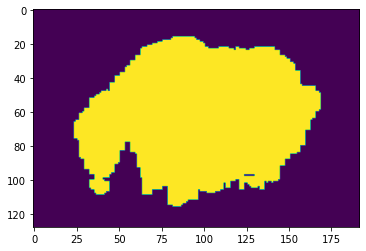

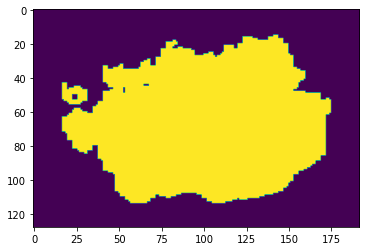

In [123]:
plt.figure()
plt.imshow(all_labels_l.sum(0).max(1)>0)

plt.figure()
plt.imshow(all_labels_r.sum(0).max(1)>0)

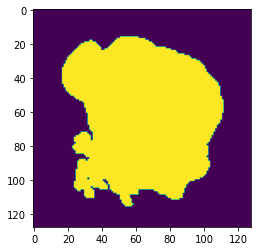

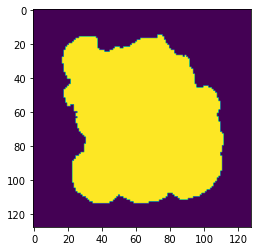

In [124]:
plt.figure()
plt.imshow(all_labels_l.sum(0).max(2)>0)

plt.figure()
plt.imshow(all_labels_r.sum(0).max(2)>0)

In [127]:
print(tumour_bbox_r)

tensor([[100, 169,  11],
        [228, 297, 203]])


In [141]:
bbox_ref_shape = np.array([96,96,96])
for i in range(105):
    print(i)
    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
    grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
    cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
    cochlea_center += tumour_bbox_l[0,:]

    center = cochlea_center
    center = center.round()
    bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

    img = nib.load('./preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_ceT1.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_Label.nii.gz'.format(i + 1))

    spacing = img.header.get_zooms()

    img = img.get_fdata()
    label = label.get_fdata()

    img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
    label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

    save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/source_training/crossmoda_{}_ceT1_l.nii.gz'.format(i + 1))
    save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/source_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1))

    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
    grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
    cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
    cochlea_center += tumour_bbox_r[0,:]

    center = cochlea_center
    center = center.round()
    bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

    img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
    label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

    save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/source_training/crossmoda_{}_ceT1_r.nii.gz'.format(i + 1))
    save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/source_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1))
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


<ipython-input-141-8ce24f7ecd2a>:6: RuntimeWarning: invalid value encountered in true_divide
  cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]


72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


In [166]:
bbox_ref_shape = np.array([96,96,96])
for i in range(105,210):
    img = nib.load('./preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_Label.nii.gz'.format(i + 1))

    spacing = img.header.get_zooms()

    img = img.get_fdata()
    label = label.get_fdata()
        
    print(i)
    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
    if cochlea_label.sum() > 0:
        grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
        cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
        cochlea_center += tumour_bbox_l[0,:]
        cochlea_center[2] += 40

        center = cochlea_center
        center = center.round()
        bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

        img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
        label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

        save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/target_training/crossmoda_{}_hrT2_l.nii.gz'.format(i + 1))
        save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/target_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1))

    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
    if cochlea_label.sum() > 0:
        grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
        cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
        cochlea_center += tumour_bbox_r[0,:]
        cochlea_center[2] += 40

        center = cochlea_center
        center = center.round()
        bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

        img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
        label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

        save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/target_training/crossmoda_{}_hrT2_r.nii.gz'.format(i + 1))
        save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/target_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1))

105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209


In [167]:
bbox_ref_shape = np.array([96,96,96])
for i in range(210,242):
    img = nib.load('./preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_Label.nii.gz'.format(i + 1))

    spacing = img.header.get_zooms()

    img = img.get_fdata()
    label = label.get_fdata()
        
    print(i)
    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
    if cochlea_label.sum() > 0:
        grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
        cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
        cochlea_center += tumour_bbox_l[0,:]
        cochlea_center[2] += 40

        center = cochlea_center
        center = center.round()
        bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

        img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
        label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

        save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/target_validation/crossmoda_{}_hrT2_l.nii.gz'.format(i + 1))
        save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/target_validation/crossmoda_{}_Label_l.nii.gz'.format(i + 1))

    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
    if cochlea_label.sum() > 0:
        grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
        cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
        cochlea_center += tumour_bbox_r[0,:]
        cochlea_center[2] += 40

        center = cochlea_center
        center = center.round()
        bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

        img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
        label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

        save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/target_validation/crossmoda_{}_hrT2_r.nii.gz'.format(i + 1))
        save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/96/target_validation/crossmoda_{}_Label_r.nii.gz'.format(i + 1))

210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


In [142]:
bbox_ref_shape = np.array([128,128,128])
for i in range(105):
    print(i)
    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
    grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
    cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
    cochlea_center += tumour_bbox_l[0,:]

    center = cochlea_center
    center = center.round()
    bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

    img = nib.load('./preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_ceT1.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/source_training/crossmoda_{}_Label.nii.gz'.format(i + 1))

    spacing = img.header.get_zooms()

    img = img.get_fdata()
    label = label.get_fdata()

    img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
    label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

    save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/source_training/crossmoda_{}_ceT1_l.nii.gz'.format(i + 1))
    save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/source_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1))

    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
    grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
    cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
    cochlea_center += tumour_bbox_r[0,:]

    center = cochlea_center
    center = center.round()
    bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

    img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
    label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

    save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/source_training/crossmoda_{}_ceT1_r.nii.gz'.format(i + 1))
    save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/source_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1))
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71


<ipython-input-142-2f6cd9cb656d>:6: RuntimeWarning: invalid value encountered in true_divide
  cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]


72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


In [168]:
bbox_ref_shape = np.array([128,128,128])
for i in range(105,210):
    img = nib.load('./preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/target_training/crossmoda_{}_Label.nii.gz'.format(i + 1))

    spacing = img.header.get_zooms()

    img = img.get_fdata()
    label = label.get_fdata()
        
    print(i)
    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
    if cochlea_label.sum() > 0:
        grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
        cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
        cochlea_center += tumour_bbox_l[0,:]
        cochlea_center[2] += 40

        center = cochlea_center
        center = center.round()
        bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

        img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
        label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

        save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/target_training/crossmoda_{}_hrT2_l.nii.gz'.format(i + 1))
        save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/target_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1))

    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
    if cochlea_label.sum() > 0:
        grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
        cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
        cochlea_center += tumour_bbox_r[0,:]
        cochlea_center[2] += 40

        center = cochlea_center
        center = center.round()
        bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

        img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
        label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

        save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/target_training/crossmoda_{}_hrT2_r.nii.gz'.format(i + 1))
        save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/target_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1))

105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209


In [169]:
bbox_ref_shape = np.array([128,128,128])
for i in range(210,242):
    img = nib.load('./preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_hrT2.nii.gz'.format(i + 1))
    label = nib.load('./preprocessed_new/resampled/0.5mm/target_validation/crossmoda_{}_Label.nii.gz'.format(i + 1))

    spacing = img.header.get_zooms()

    img = img.get_fdata()
    label = label.get_fdata()
        
    print(i)
    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
    if cochlea_label.sum() > 0:
        grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
        cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
        cochlea_center += tumour_bbox_l[0,:]
        cochlea_center[2] += 40

        center = cochlea_center
        center = center.round()
        bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

        img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
        label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

        save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/target_validation/crossmoda_{}_hrT2_l.nii.gz'.format(i + 1))
        save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/target_validation/crossmoda_{}_Label_l.nii.gz'.format(i + 1))

    cochlea_label = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
    if cochlea_label.sum() > 0:
        grid = F.affine_grid(torch.eye(3,4).unsqueeze(0), [1, 1, *cochlea_label.shape], align_corners=True)
        cochlea_center = kpts_world((grid * torch.from_numpy(cochlea_label/cochlea_label.sum()).view(1, *cochlea_label.shape, 1)).sum([1,2,3]).unsqueeze(0), cochlea_label.shape, align_corners=True)[0, 0]
        cochlea_center += tumour_bbox_r[0,:]
        cochlea_center[2] += 40

        center = cochlea_center
        center = center.round()
        bbox = torch.stack((center - bbox_ref_shape//2, center + bbox_ref_shape//2)).long()

        img_tumour_crop = img[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]
        label_tumour_crop = label[bbox[0,0]:bbox[1,0],bbox[0,1]:bbox[1,1],bbox[0,2]:bbox[1,2]]

        save_nifti(img_tumour_crop.astype(np.float32), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/target_validation/crossmoda_{}_hrT2_r.nii.gz'.format(i + 1))
        save_nifti(label_tumour_crop.astype(np.uint8), spacing, './preprocessed_new/resampled/0.5mm/localised_crop/128/target_validation/crossmoda_{}_Label_r.nii.gz'.format(i + 1))

210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


In [184]:
all_labels_l = []
all_labels_r = []
for i in range(105):
    print(i)
    if i+1 in ind_l:
        label_l = nib.load('./preprocessed_new/resampled/0.5mm/localised_crop/128/source_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
        all_labels_l.append(label_l)
    else:
        label_r = nib.load('./preprocessed_new/resampled/0.5mm/localised_crop/128/source_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
        all_labels_r.append(label_r)
    
for i in range(105,210):
    print(i)
    if i+1 in ind_l:
        try:
            label_l = nib.load('./preprocessed_new/resampled/0.5mm/localised_crop/128/target_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
            all_labels_l.append(label_l)
        except:
            pass
    else:
        try:
            label_r = nib.load('./preprocessed_new/resampled/0.5mm/localised_crop/128/target_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
            all_labels_r.append(label_r)
        except:
            pass
        
for i in range(210,242):
    print(i)
    if i+1 in ind_l:
        try:
            label_l = nib.load('./preprocessed_new/resampled/0.5mm/localised_crop/128/target_validation/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
            all_labels_l.append(label_l)
        except:
            pass
    else:
        try:
            label_r = nib.load('./preprocessed_new/resampled/0.5mm/localised_crop/128/target_validation/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
            all_labels_r.append(label_r)
        except:
            pass
        
all_labels_l = np.stack(all_labels_l)
all_labels_r = np.stack(all_labels_r)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


In [193]:
all_labels_l = []
all_labels_r = []
for i in range(105):
    print(i)
    if i+1 in ind_l:
        label_l = nib.load('./preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
        all_labels_l.append(label_l)
    else:
        label_r = nib.load('./preprocessed_new/resampled/0.5mm/crop/source_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
        all_labels_r.append(label_r)
    
for i in range(105,210):
    print(i)
    if i+1 in ind_l:
        try:
            label_l = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
            all_labels_l.append(label_l)
        except:
            pass
    else:
        try:
            label_r = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_training/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
            all_labels_r.append(label_r)
        except:
            pass
        
for i in range(210,242):
    print(i)
    if i+1 in ind_l:
        try:
            label_l = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_l.nii.gz'.format(i + 1)).get_fdata() == 2
            all_labels_l.append(label_l)
        except:
            pass
    else:
        try:
            label_r = nib.load('./preprocessed_new/resampled/0.5mm/crop/target_validation/crossmoda_{}_Label_r.nii.gz'.format(i + 1)).get_fdata() == 2
            all_labels_r.append(label_r)
        except:
            pass
        
all_labels_l = np.stack(all_labels_l)
all_labels_r = np.stack(all_labels_r)




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


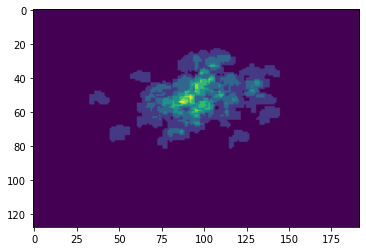

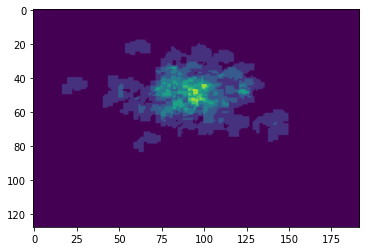

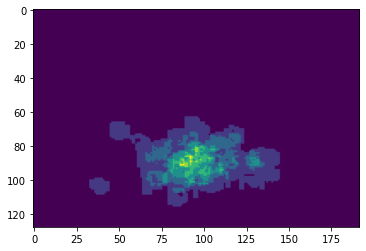

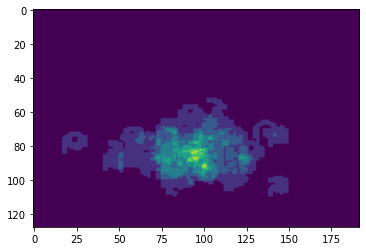

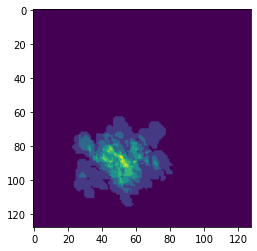

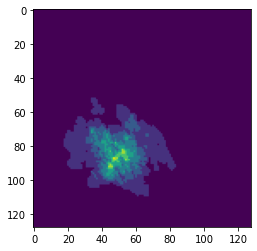

In [194]:
plt.figure()
plt.imshow(all_labels_l.sum(0).max(0))

plt.figure()
plt.imshow(np.flip(all_labels_r, axis=1).sum(0).max(0))

plt.figure()
plt.imshow(all_labels_l.sum(0).max(1))

plt.figure()
plt.imshow(np.flip(all_labels_r, axis=1).sum(0).max(1))

plt.figure()
plt.imshow(all_labels_l.sum(0).max(2))

plt.figure()
plt.imshow(np.flip(all_labels_r, axis=1).sum(0).max(2))